In [29]:
import numpy as np
import matplotlib.pylab as plt

def fD(f,h,t):
    fd = (f(t+h)-f(t))/h
    return fd
    
def cD(f,h,t):
    cd = (f(t+h/2)-f(t-h/2))/h
    return cd

def eD(f,h,t):
    ed = (8*(f(t+h/4)-f(t-h/4))-(f(t+h/2)-f(t-h/2)))/3/h
    return ed

def sD1(f,h,t):
    d = ((f(t+h)-f(t))-(f(t)-f(t-h)))/h**2
    return d

def sD2(f,h,t):
    d = (f(t+h)+f(t-h)-2*f(t))/h**2
    return d

In [6]:
def cos(t):
    y = np.cos(t)
    return y

def dcos(t):
    y = -np.sin(t)
    return y

def d2cos(t):
    y = -np.cos(t)
    return y

def exp(t):
    y = np.exp(t)
    return y

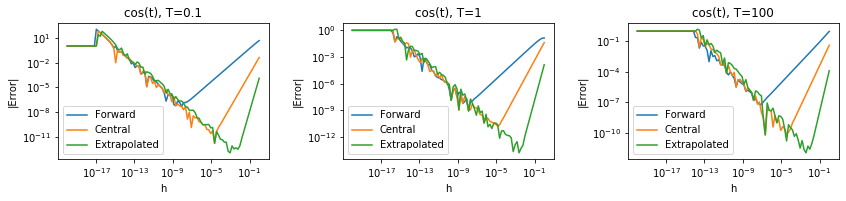

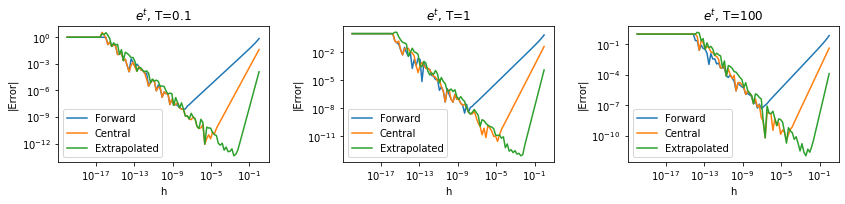

In [45]:
F = [cos,exp]
dF = [dcos,exp]
tF = ['cos(t)','$e^t$']
T = [0.1,1,100]
H = np.logspace(-20,-0.001,100)

for f in range(len(F)):
    plt.figure(figsize=(14,2.5))
    for t in T:
        ef = []
        ec = []
        ee = []
        for h in H:
            ef.append(abs((fD(F[f],h,t)-dF[f](t))/dF[f](t)))
            ec.append(abs((cD(F[f],h,t)-dF[f](t))/dF[f](t)))
            ee.append(abs((eD(F[f],h,t)-dF[f](t))/dF[f](t)))
        plt.subplot(1,3,T.index(t)+1)
        plt.plot(H,ef,label='Forward')
        plt.plot(H,ec,label='Central')
        plt.plot(H,ee,label='Extrapolated')
        plt.title(str(tF[f])+', T='+str(t))
        plt.xlabel('h')
        plt.ylabel('|Error|')
        plt.loglog()
        plt.legend()
    plt.subplots_adjust(wspace=0.35)
    plt.savefig('pD'+str(tF[0])+'.png')

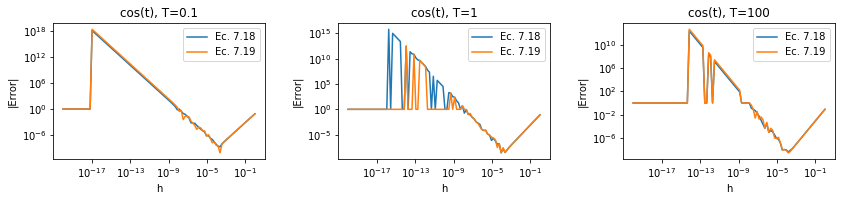

In [46]:
d2F = [d2cos,exp]

plt.figure(figsize=(14,2.5))
for t in T:
    e1 = []
    e2 = []
    for h in H:
        e1.append(abs((sD1(F[0],h,t)-d2F[0](t))/d2F[0](t)))
        e2.append(abs((sD2(F[0],h,t)-d2F[0](t))/d2F[0](t)))
    plt.subplot(1,3,T.index(t)+1)
    plt.plot(H,e1,label='Ec. 7.18')
    plt.plot(H,e2,label='Ec. 7.19')
    plt.title(str(tF[0])+', T='+str(t))
    plt.xlabel('h')
    plt.ylabel('|Error|')
    plt.loglog()
    plt.legend()
plt.subplots_adjust(wspace=0.35)
plt.savefig('sD'+str(tF[0])+'.png')

In [55]:
abs((sD1(cos,0.05,100)-d2cos(100))/d2cos(100))

0.0002083159731828491